In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churncustomerprediction/Churn_Modelling.csv


Dataset shape: (10000, 14)

Class distribution:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

----------------------------------------
Evaluating Logistic Regression

Accuracy: 0.7135
ROC AUC: 0.7772
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



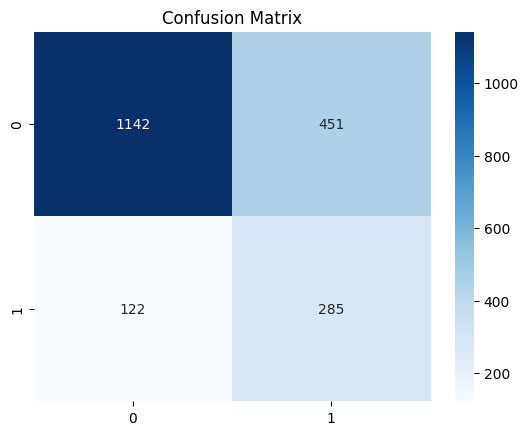


----------------------------------------
Evaluating Random Forest

Accuracy: 0.8570
ROC AUC: 0.8487
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



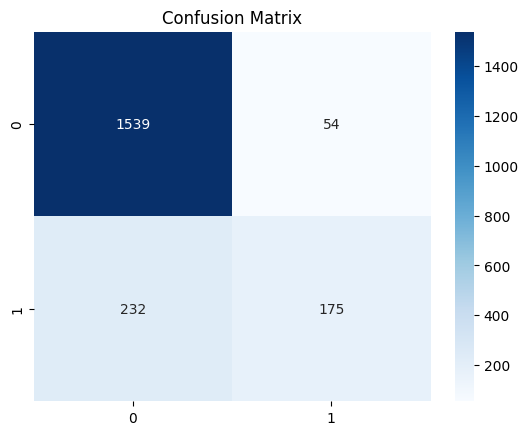


----------------------------------------
Evaluating Gradient Boosting

Accuracy: 0.8685
ROC AUC: 0.8702
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.78      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



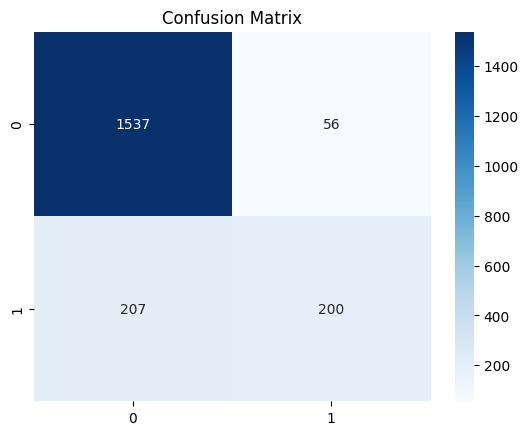

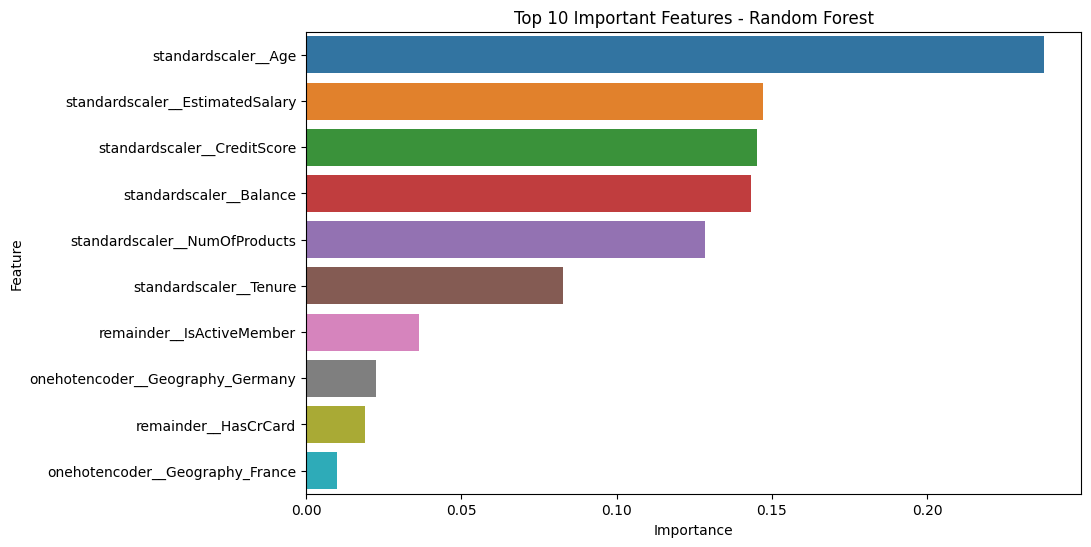

In [13]:
# Customer Churn Prediction (Simplified)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve)

# 1. Load dataset
df = pd.read_csv('/kaggle/input/churncustomerprediction/Churn_Modelling.csv')
print(f"Dataset shape: {df.shape}")

# 2. Quick EDA
print("\nClass distribution:")
print(df['Exited'].value_counts(normalize=True))

# 3. Preprocessing
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Create preprocessing transformer
preprocessor = make_column_transformer(
    (StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']),
    (OneHotEncoder(), ['Geography', 'Gender']),
    remainder='passthrough'
)

# 6. Model Training
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100)
}

# 7. Evaluation function (simplified)
def evaluate_model(model, X_test, y_test):
    model.fit(preprocessor.fit_transform(X_train), y_train)
    y_pred = model.predict(preprocessor.transform(X_test))
    y_proba = model.predict_proba(preprocessor.transform(X_test))[:,1]
    
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

# 8. Train and compare models
for name, model in models.items():
    print(f"\n{'-'*40}")
    print(f"Evaluating {name}")
    evaluate_model(model, X_test, y_test)

# 9. Feature Importance (Random Forest example)
rf_model = RandomForestClassifier(n_estimators=100).fit(preprocessor.fit_transform(X_train), y_train)
feature_names = preprocessor.get_feature_names_out()
importances = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_})
importances = importances.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Top 10 Important Features - Random Forest')
plt.show()
